In [ ]:
# ODI World Cup 2023 Data Analysis

# Welcome to this Jupyter Notebook where we explore and analyze the "ODI World Cup 2023" dataset.
# Through this notebook, you will find:
# - Batting & Bowling Analysis
# - Team & Player Performances
# - Match Insights & Venue
# - Data-Driven Visualizations


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load the datasets
df = pd.read_csv("batting_summary.csv")
df1 = pd.read_csv("bowling_summary.csv")
df2 = pd.read_csv("match_schedule_results.csv")
df3 = pd.read_csv("world_cup_players_info.csv")




In [10]:
print("size of data")
print("batting summary \t:", {df.shape})
print("bowling summary \t:", {df1.shape})
print("match results summary \t:", {df2.shape})
print("players summary \t:", {df3.shape})

size of data
batting summary 	: {(916, 11)}
bowling summary 	: {(574, 9)}
match results summary 	: {(48, 7)}
players summary 	: {(151, 7)}


# Batting Summary

# PLayer Level Insights

In [56]:
# Display the first few rows of each dataset
df.head(10)

Match_no           Match_Between Team_Innings      Batsman_Name  \
0         1  England vs New Zealand      England    Jonny Bairstow   
1         1  England vs New Zealand      England       Dawid Malan   
2         1  England vs New Zealand      England          Joe Root   
3         1  England vs New Zealand      England       Harry Brook   
4         1  England vs New Zealand      England         Moeen Ali   
5         1  England vs New Zealand      England       Jos Buttler   
6         1  England vs New Zealand      England  Liam Livingstone   
7         1  England vs New Zealand      England        Sam Curran   
8         1  England vs New Zealand      England      Chris Woakes   
9         1  England vs New Zealand      England       Adil Rashid   

   Batting_Position                            Dismissal  Runs  Balls  4s  6s  \
0                 1  c Daryl Mitchell b Mitchell Santner    33     35   4   1   
1                 2            c Tom Latham b Matt Henry    14     24   2   0   
2                 3                     b Glenn Phillips    77     86   4   1   
3                 4     c Devon Conway b Rachin Ravindra    25     16   4   1   
4                 5                     b Glenn Phillips    11     17   1   0   
5                 6            c Tom Latham b Matt Henry    43     42   2   2   
6                 7           c Matt Henry b Trent Boult    20     22   3   0   
7                 8            c Tom Latham b Matt Henry    14     19   0   0   
8                 9      c Will Young b Mitchell Santner    11     12   1   0   
9                10                              not out    15     13   0   1   

  Strike_Rate  
0      94.300  
1      58.300  
2      89.500  
3     156.300  
4      64.700  
5     102.400  
6      90.900  
7      73.700  
8      91.700  
9     115.400

In [54]:
df.duplicated().sum()

0

In [16]:
# Top Scorers - Sum runs by batsman and sort
top_scorers = df.groupby("Batsman_Name")["Runs"].sum().reset_index().sort_values(by="Runs", ascending=False)

# Batting Averages - Total runs divided by total dismissals (excluding "Not Out" cases)
df["Dismissal"] = df["Dismissal"].str.lower()
dismissals = df[~df["Dismissal"].str.contains("not out", na=False)]
batting_averages = dismissals.groupby("Batsman_Name")["Runs"].sum() / dismissals.groupby("Batsman_Name").size()
batting_averages = batting_averages.reset_index().rename(columns={0: "Batting_Average"}).sort_values(by="Batting_Average", ascending=False)

# Most Sixes & Fours - Sum of boundaries
power_hitters = df.groupby("Batsman_Name")[["4s", "6s"]].sum().reset_index().sort_values(by=["6s", "4s"], ascending=False)

# Display results
from IPython.display import display

print("Top Scorers:")
display(top_scorers.head(10))

print("\nBatting Averages:")
display(batting_averages.head(10))

print("\nMost Sixes & Fours:")
display(power_hitters.head(10))


Top Scorers:


Batsman_Name  Runs
143            Virat Kohli   765
103        Quinton de Kock   706
113           Rohit Sharma   597
104        Rachin Ravindra   578
21            David Warner   577
18          Daryl Mitchell   552
125           Shreyas Iyer   530
108  Rassie van der Dussen   480
20            David Miller   474
4            Aiden Markram   472


Batting Averages:


Batsman_Name  Batting_Average
139      Virat Kohli        63.250000
56   Kane Williamson        59.333333
100  Quinton de Kock        58.833333
17    Daryl Mitchell        57.875000
135      Travis Head        55.857143
110     Rohit Sharma        54.272727
3        Agha Salman        51.000000
11        Ben Stokes        50.666667
101  Rachin Ravindra        50.555556
108  Reeza Hendricks        48.500000


Most Sixes & Fours:


Batsman_Name  4s  6s
113      Rohit Sharma  66  31
21       David Warner  53  28
103   Quinton de Kock  65  26
20       David Miller  34  26
125      Shreyas Iyer  37  24
18     Daryl Mitchell  48  22
34      Glenn Maxwell  40  22
82     Mitchell Marsh  43  21
43   Heinrich Klaasen  35  21
31       Fakhar Zaman  14  18

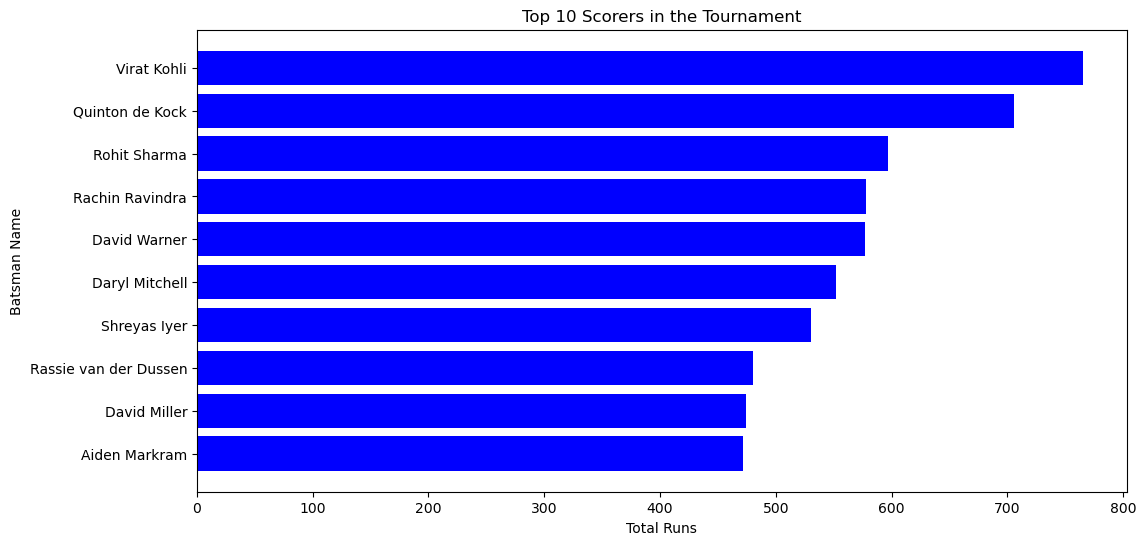

In [30]:
# Select top 10 scorers for visualization
top_10_scorers = top_scorers.head(10)

# Plot bar chart for top scorers
plt.figure(figsize=(12, 6))
plt.barh(top_10_scorers["Batsman_Name"], top_10_scorers["Runs"], color='blue')
plt.xlabel("Total Runs")
plt.ylabel("Batsman Name")
plt.title("Top 10 Scorers in the Tournament")
plt.gca().invert_yaxis()  # Invert y-axis to show the top scorer at the top
plt.show()

In [35]:
# Fastest Fifties & Hundreds - Identify innings where batsmen reached 50 or 100 in the least balls
df["Fifty"] = df["Runs"].apply(lambda x: 1 if x >= 50 else 0)
df["Hundred"] = df["Runs"].apply(lambda x: 1 if x >= 100 else 0)

# Filter innings where batsmen scored 50 or 100
fifties = df[df["Fifty"] == 1].sort_values(by="Balls", ascending=True)[["Batsman_Name", "Runs", "Balls"]].head(10)
hundreds = df[df["Hundred"] == 1].sort_values(by="Balls", ascending=True)[["Batsman_Name", "Runs", "Balls"]].head(10)

print("Fastest Fifties:")
display(fifties)

print("\nFastest Hundreds:")
display(hundreds)




Fastest Fifties:


Batsman_Name  Runs  Balls
794  Kusal Janith Perera    51     28
634         David Miller    53     30
866         Shubman Gill    51     32
877      Teja Nidamanuru    54     39
551        Jimmy Neesham    58     39
413         Marco Jansen    75     42
62          Kusal Mendis    76     42
352         Tanzid Hasan    51     43
166        Aiden Markram    56     44
167        Aiden Markram    56     44


Fastest Hundreds:


Batsman_Name  Runs  Balls
481     Glenn Maxwell   106     44
56      Aiden Markram   106     54
869          KL Rahul   102     64
411  Heinrich Klaasen   109     67
535       Travis Head   109     67
885      Shreyas Iyer   105     70
132      Kusal Mendis   122     77
693      Fakhar Zaman   126     81
774        Ben Stokes   108     84
53    Quinton de Kock   100     84

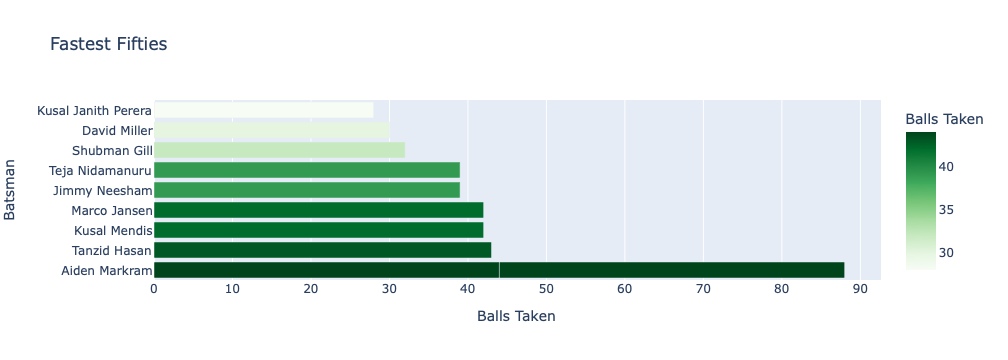

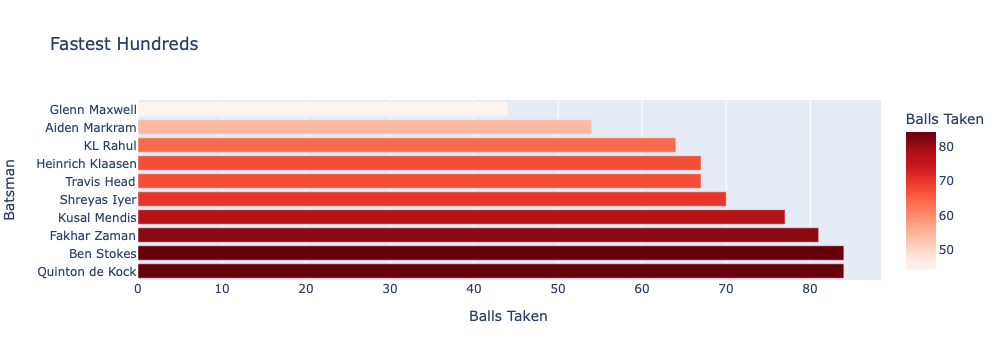

In [47]:
# Plot bar charts for fastest fifties and hundreds

# Fastest Fifties & Hundreds
fastest_fifties = df[df["Runs"] >= 50].sort_values(by="Balls", ascending=True)[["Batsman_Name", "Balls", "Runs"]].head(10)
fastest_hundreds = df[df["Runs"] >= 100].sort_values(by="Balls", ascending=True)[["Batsman_Name", "Balls", "Runs"]].head(10)

# Fastest Fifties Plot
fig_fifties = px.bar(
    fastest_fifties, 
    x="Balls", 
    y="Batsman_Name", 
    orientation="h",
    title="Fastest Fifties",
    labels={"Balls": "Balls Taken", "Batsman_Name": "Batsman"},
    hover_data=["Runs"],
    color="Balls",
    color_continuous_scale="greens"
)
fig_fifties.update_layout(yaxis=dict(autorange="reversed"))  # Reverse Y-axis for better readability
fig_fifties.show()

# Fastest Hundreds Plot
fig_hundreds = px.bar(
    fastest_hundreds, 
    x="Balls", 
    y="Batsman_Name", 
    orientation="h",
    title="Fastest Hundreds",
    labels={"Balls": "Balls Taken", "Batsman_Name": "Batsman"},
    hover_data=["Runs"],
    color="Balls",
    color_continuous_scale="reds"
)
fig_hundreds.update_layout(yaxis=dict(autorange="reversed"))  # Reverse Y-axis for better readability
fig_hundreds.show()


# Team level Insights

Team-Wise Batting Performance:


Team_Innings  Runs
1     Australia  3303
8  South Africa  3272
4         India  3038
6   New Zealand  2712
7      Pakistan  2220
3       England  2135
0   Afghanistan  1990
2    Bangladesh  1944
9     Sri Lanka  1942
5   Netherlands  1728


Best Opening Partnerships:


Team_Innings  Runs
1     Australia  1164
4         India   998
8  South Africa   983
6   New Zealand   750
7      Pakistan   718
0   Afghanistan   656
3       England   619
9     Sri Lanka   496
2    Bangladesh   429
5   Netherlands   278


Middle-Order Contributions:


Team_Innings  Runs
8  South Africa  1395
1     Australia  1140
4         India  1090
6   New Zealand  1034
7      Pakistan   826
2    Bangladesh   785
9     Sri Lanka   776
0   Afghanistan   772
3       England   690
5   Netherlands   556

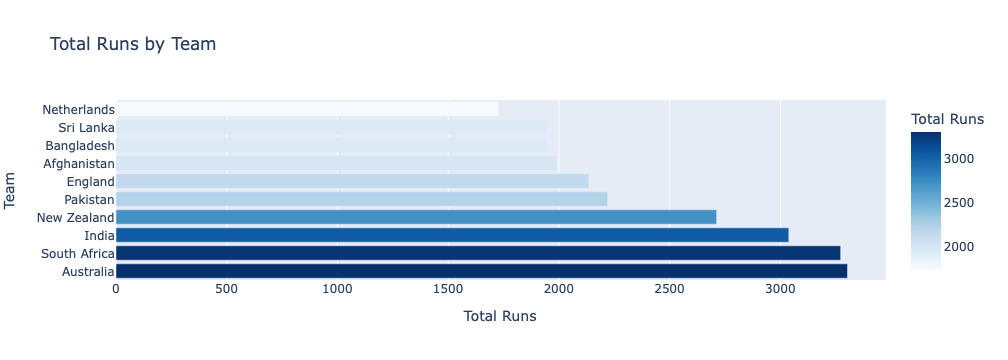

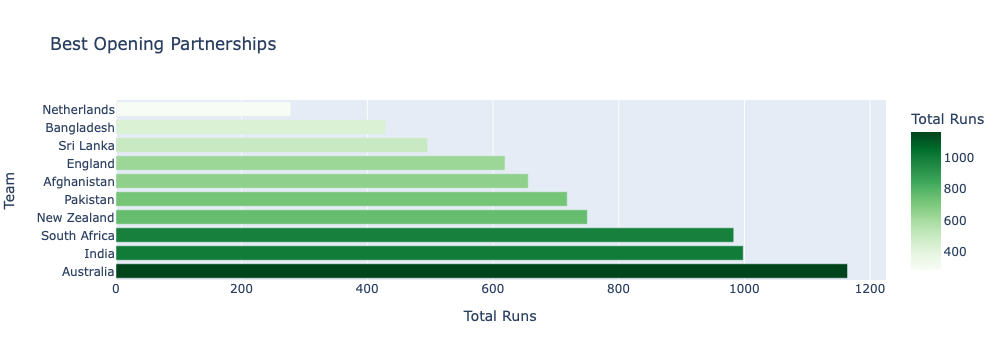

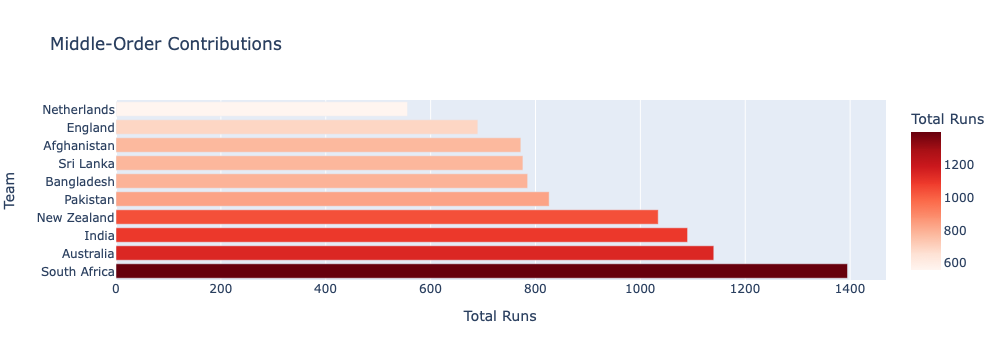

In [48]:
# Team-Wise Batting Performance: Sum total runs per team
team_batting_performance = df.groupby("Team_Innings")["Runs"].sum().reset_index().sort_values(by="Runs", ascending=False)

# Best Opening Partnerships: Sum runs for each opening pair (batting positions 1 & 2)
opening_pairs = df[df["Batting_Position"] <= 2].groupby(["Team_Innings", "Batsman_Name"])["Runs"].sum().reset_index()
opening_partnerships = opening_pairs.groupby("Team_Innings")["Runs"].sum().reset_index().sort_values(by="Runs", ascending=False)

# Middle-Order Contributions: Sum runs for batting positions 4-6
middle_order = df[(df["Batting_Position"] >= 4) & (df["Batting_Position"] <= 6)].groupby("Team_Innings")["Runs"].sum().reset_index()
middle_order = middle_order.sort_values(by="Runs", ascending=False)


print("Team-Wise Batting Performance:")
display(team_batting_performance)

print("\nBest Opening Partnerships:")
display(opening_partnerships)

print("\nMiddle-Order Contributions:")
display(middle_order)

# Visualization using Plotly
fig1 = px.bar(team_batting_performance, x="Runs", y="Team_Innings", orientation="h", title="Total Runs by Team", labels={"Runs": "Total Runs", "Team_Innings": "Team"}, color="Runs", color_continuous_scale="Blues")
fig1.show()

fig2 = px.bar(opening_partnerships, x="Runs", y="Team_Innings", orientation="h", title="Best Opening Partnerships", labels={"Runs": "Total Runs", "Team_Innings": "Team"}, color="Runs", color_continuous_scale="Greens")
fig2.show()

fig3 = px.bar(middle_order, x="Runs", y="Team_Innings", orientation="h", title="Middle-Order Contributions", labels={"Runs": "Total Runs", "Team_Innings": "Team"}, color="Runs", color_continuous_scale="Reds")
fig3.show()




# Bowling analysis

In [50]:
df1.head(10)

Match_no           Match_Between Bowling_Team       Bowler_Name  Overs  \
0         1  England vs New Zealand  New Zealand       Trent Boult   10.0   
1         1  England vs New Zealand  New Zealand        Matt Henry   10.0   
2         1  England vs New Zealand  New Zealand  Mitchell Santner   10.0   
3         1  England vs New Zealand  New Zealand     Jimmy Neesham    7.0   
4         1  England vs New Zealand  New Zealand   Rachin Ravindra   10.0   
5         1  England vs New Zealand  New Zealand    Glenn Phillips    3.0   
6         1  England vs New Zealand      England      Chris Woakes    6.0   
7         1  England vs New Zealand      England        Sam Curran    6.0   
8         1  England vs New Zealand      England         Mark Wood    5.0   
9         1  England vs New Zealand      England         Moeen Ali    9.2   

   Maidens  Runs  Wickets  Economy  
0        1    48        1    4.800  
1        1    48        3    4.800  
2        0    37        2    3.700  
3        0    56        0    8.000  
4        0    76        1    7.600  
5        0    17        2    5.670  
6        0    45        0    7.500  
7        2    47        1    7.833  
8        0    55        0   11.000  
9        0    60        0    6.429

In [53]:
df1.duplicated().sum()

0

# Individual Contributions

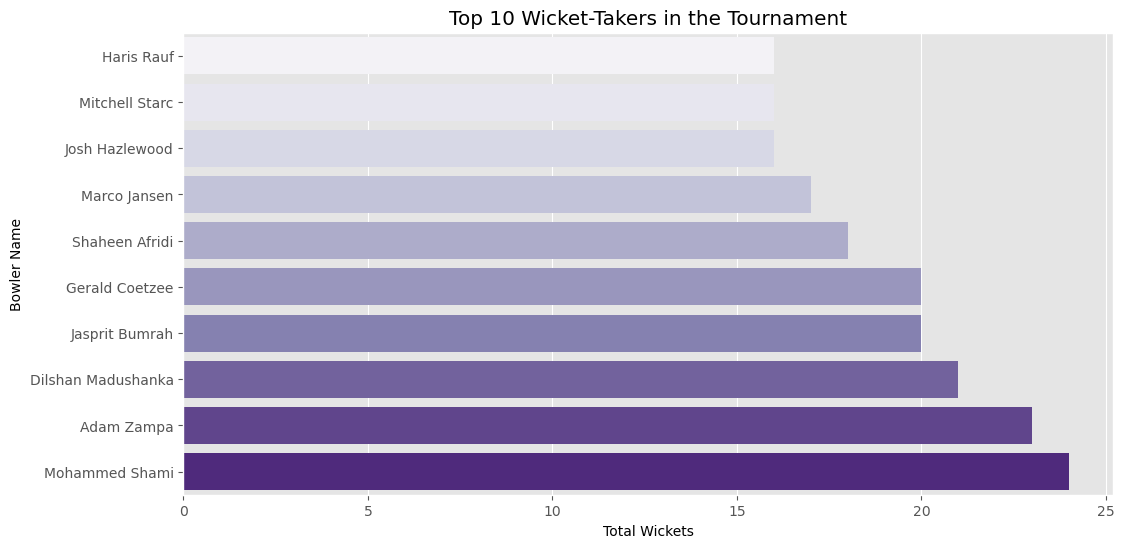

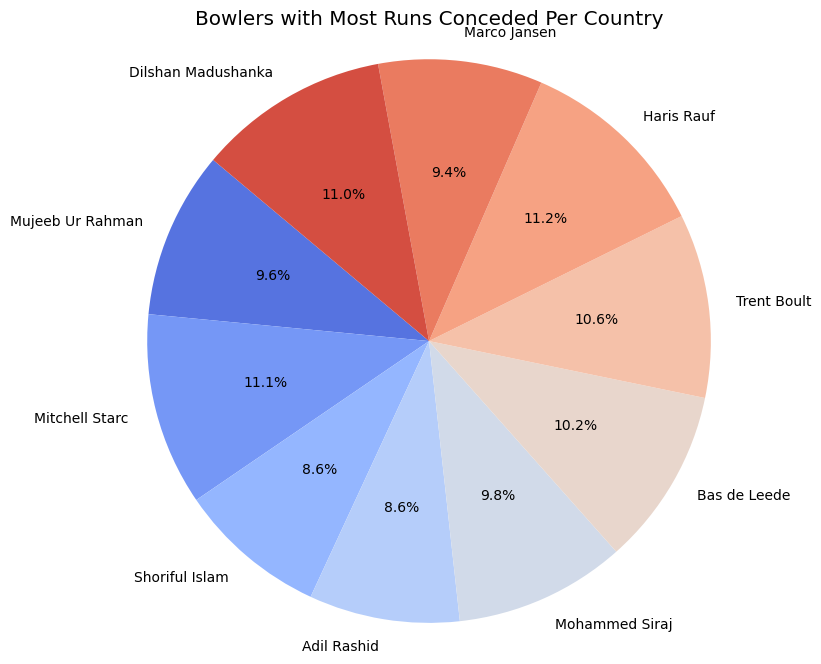

Best Bowling Figures (Most Wickets with Least Runs):


Match_no               Match_Between Bowling_Team         Bowler_Name  \
547        46        India vs New Zealand        India      Mohammed Shami   
392        33          India vs Sri Lanka        India      Mohammed Shami   
439        37       India vs South Africa        India     Ravindra Jadeja   
207        18       Australia vs Pakistan     Pakistan      Shaheen Afridi   
244        21        New Zealand vs India        India      Mohammed Shami   
70          6  New Zealand vs Netherlands  New Zealand    Mitchell Santner   
384        33          India vs Sri Lanka    Sri Lanka  Dilshan Madushanka   
288        24    Australia vs Netherlands    Australia          Adam Zampa   
346        29            India vs England        India      Mohammed Shami   
335        28   Netherlands vs Bangladesh  Netherlands   Paul van Meekeren   

     Overs  Maidens  Runs  Wickets  Economy  
547    9.5        0    57        7    5.797  
392    5.0        1    18        5    3.600  
439    9.0        1    33        5    3.667  
207   10.0        1    54        5    5.400  
244   10.0        0    54        5    5.400  
70    10.0        0    59        5    5.900  
384   10.0        0    80        5    8.000  
288    3.0        0     8        4    2.667  
346    7.0        2    22        4    3.143  
335    7.2        0    23        4    3.136

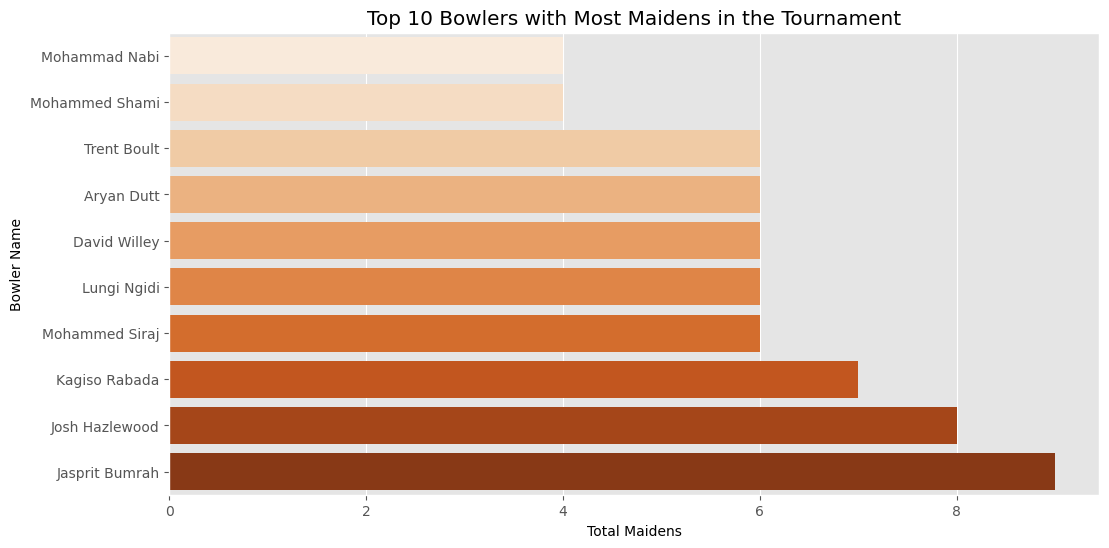

In [43]:
# Top Wicket-Takers: Sum wickets by bowler and sort
top_wicket_takers = df1.groupby("Bowler_Name")["Wickets"].sum().reset_index().sort_values(by="Wickets", ascending=False).head(10)

# Best Bowling Figures: Identify best single-match performances (most wickets with least runs)
best_bowling_figures = df1.sort_values(by=["Wickets", "Runs"], ascending=[False, True]).head(10)

# Bowlers with least and most runs conceded per country
bowler_runs_per_country = df1.groupby(["Bowling_Team", "Bowler_Name"])["Runs"].sum().reset_index()

# Most runs conceded by a bowler in a country
most_runs_bowlers = bowler_runs_per_country.loc[bowler_runs_per_country.groupby("Bowling_Team")["Runs"].idxmax()]

# Most maidens in the entire tournament
most_maidens = df1.groupby("Bowler_Name")["Maidens"].sum().reset_index().sort_values(by="Maidens", ascending=False).head(10)

# Display bar chart for top wicket-takers
plt.figure(figsize=(12, 6))
sns.barplot(y=top_wicket_takers["Bowler_Name"], x=top_wicket_takers["Wickets"], palette="Purples_r")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler Name")
plt.title("Top 10 Wicket-Takers in the Tournament")
plt.gca().invert_yaxis()
plt.show()

# Display pie chart for most runs conceded per country
plt.figure(figsize=(8, 8))
plt.pie(most_runs_bowlers["Runs"], labels=most_runs_bowlers["Bowler_Name"], autopct="%1.1f%%", startangle=140, colors=sns.color_palette("coolwarm", len(most_runs_bowlers)))
plt.title("Bowlers with Most Runs Conceded Per Country")
plt.axis("equal")
plt.show()

# Display top 10 best bowling figures

print("Best Bowling Figures (Most Wickets with Least Runs):")
display(best_bowling_figures)

# Display bar chart for most maidens in the tournament
plt.figure(figsize=(12, 6))
sns.barplot(y=most_maidens["Bowler_Name"], x=most_maidens["Maidens"], palette="Oranges_r")
plt.xlabel("Total Maidens")
plt.ylabel("Bowler Name")
plt.title("Top 10 Bowlers with Most Maidens in the Tournament")
plt.gca().invert_yaxis()
plt.show()


# Team Level Bowling Analysis

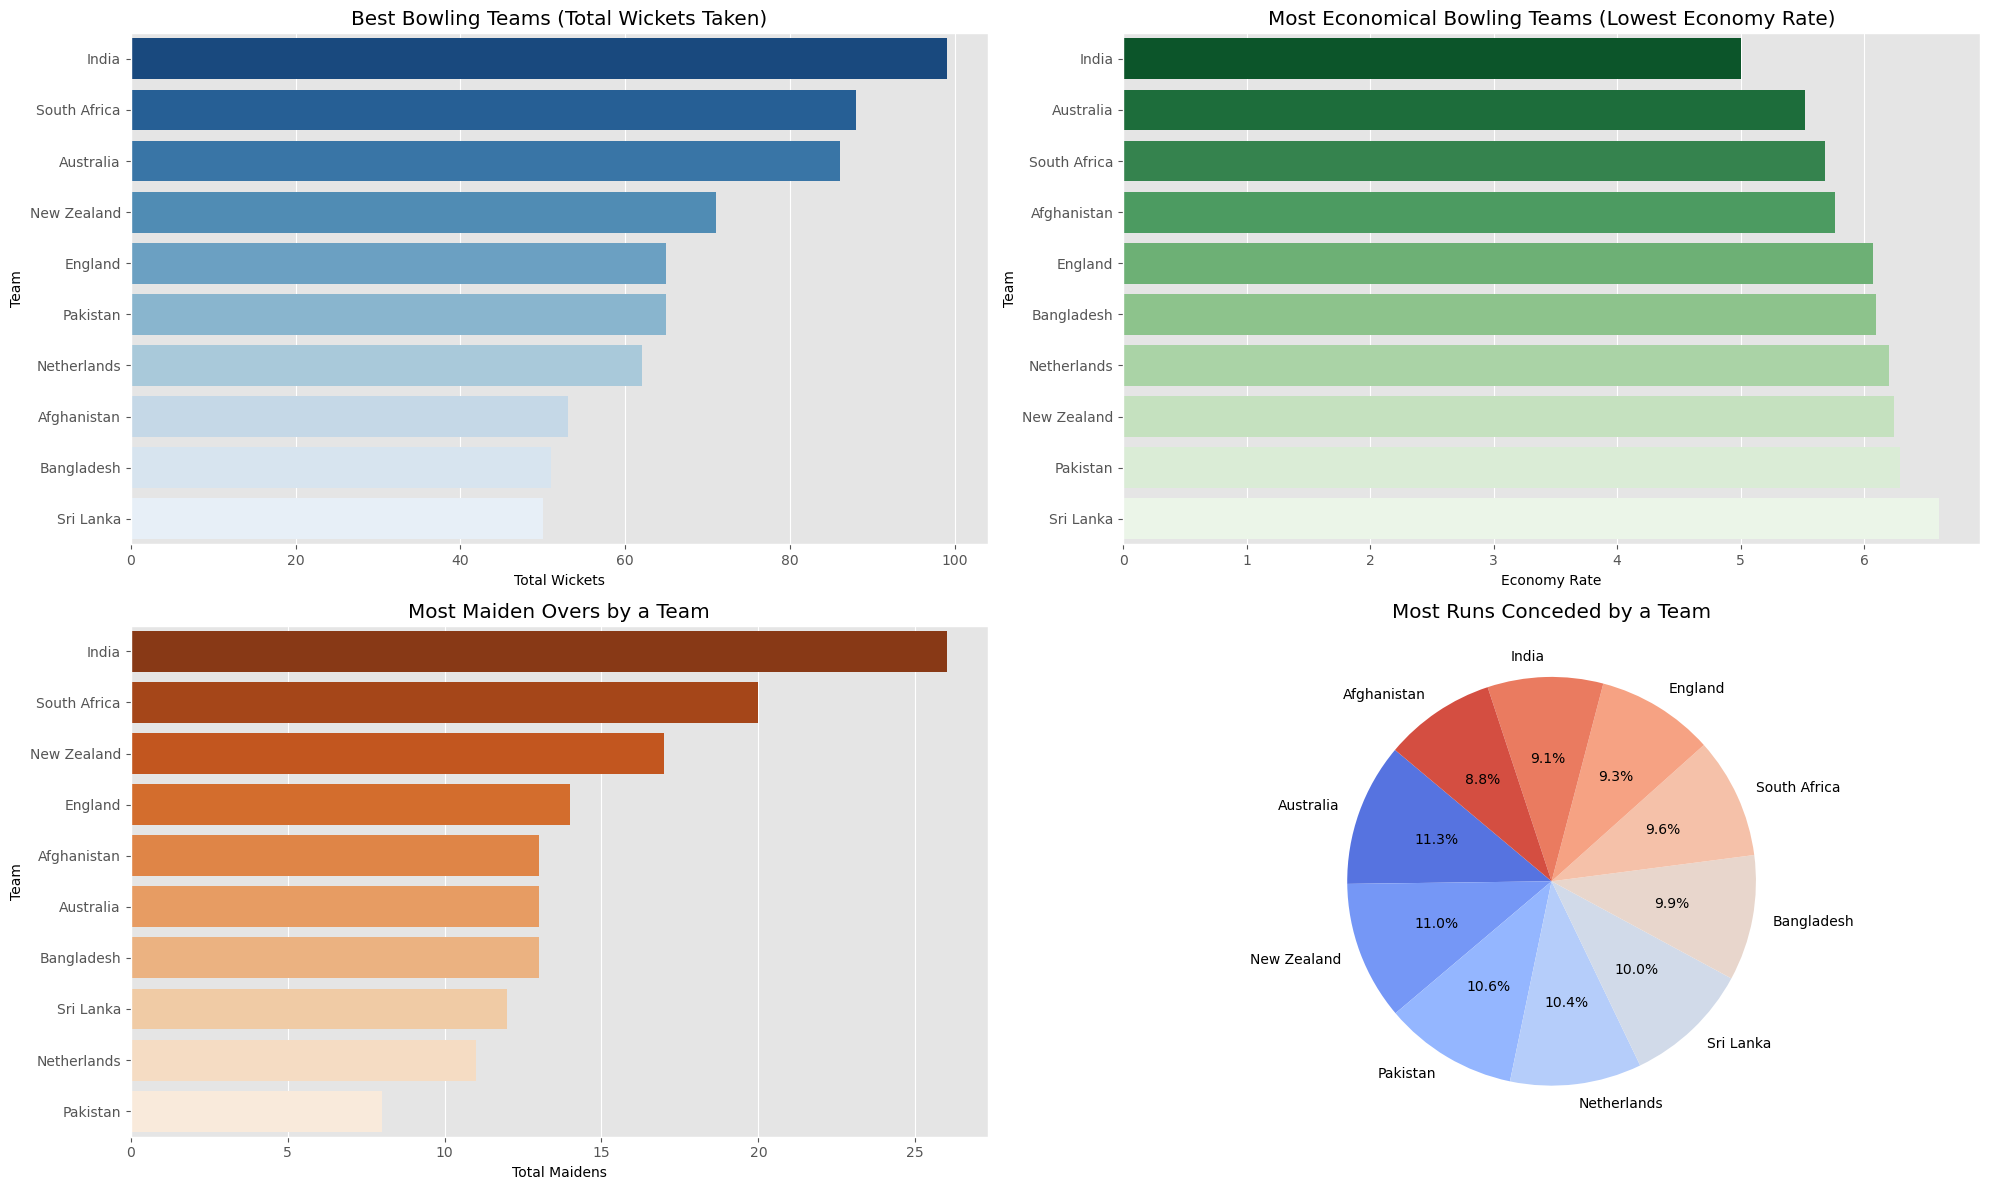

In [45]:
# Best Bowling Teams (Total Wickets Taken)
team_wickets = df1.groupby("Bowling_Team")["Wickets"].sum().reset_index().sort_values(by="Wickets", ascending=False)

# Most Economical Bowling Team (Average Economy Rate)
team_economy = df1.groupby("Bowling_Team")["Economy"].mean().reset_index().sort_values(by="Economy", ascending=True)

# Most Maiden Overs by a Team
team_maidens = df1.groupby("Bowling_Team")["Maidens"].sum().reset_index().sort_values(by="Maidens", ascending=False)

# Most Runs Conceded by a Team
team_runs_conceded = df1.groupby("Bowling_Team")["Runs"].sum().reset_index().sort_values(by="Runs", ascending=False)

# Visualization

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Best Bowling Teams - Wickets Taken
sns.barplot(y=team_wickets["Bowling_Team"], x=team_wickets["Wickets"], ax=axes[0, 0], palette="Blues_r")
axes[0, 0].set_title("Best Bowling Teams (Total Wickets Taken)")
axes[0, 0].set_xlabel("Total Wickets")
axes[0, 0].set_ylabel("Team")

# Most Economical Bowling Teams
sns.barplot(y=team_economy["Bowling_Team"], x=team_economy["Economy"], ax=axes[0, 1], palette="Greens_r")
axes[0, 1].set_title("Most Economical Bowling Teams (Lowest Economy Rate)")
axes[0, 1].set_xlabel("Economy Rate")
axes[0, 1].set_ylabel("Team")

# Most Maiden Overs by a Team
sns.barplot(y=team_maidens["Bowling_Team"], x=team_maidens["Maidens"], ax=axes[1, 0], palette="Oranges_r")
axes[1, 0].set_title("Most Maiden Overs by a Team")
axes[1, 0].set_xlabel("Total Maidens")
axes[1, 0].set_ylabel("Team")

# Most Runs Conceded by a Team (Pie Chart)
axes[1, 1].pie(team_runs_conceded["Runs"], labels=team_runs_conceded["Bowling_Team"], autopct="%1.1f%%", startangle=140, colors=sns.color_palette("coolwarm", len(team_runs_conceded)))
axes[1, 1].set_title("Most Runs Conceded by a Team")

plt.tight_layout()
plt.show()


# Match Schedule Results dataset analysis

In [51]:
df2.head(10)

Match_no        Date                          Venue          Team1  \
0         1   October 5                      Ahmedabad       England    
1         2   October 6                      Hyderabad      Pakistan    
2         3   October 7                     Dharamsala    Bangladesh    
3         4   October 7                          Delhi  South Africa    
4         5   October 8                        Chennai         India    
5         6   October 9                      Hyderabad   New Zealand    
6         7  October 10                     Dharamsala       England    
7         8  October 10                      Hyderabad      Pakistan    
8         9  October 11                          Delhi         India    
9        10  October 12  Ekana Cricket Stadium Lucknow     Australia    

           Team2        Winner  \
0    New Zealand   New Zealand   
1    Netherlands      Pakistan   
2    Afghanistan    Bangladesh   
3      Sri Lanka  South Africa   
4      Australia         India   
5    Netherlands   New Zealand   
6    Bangladesh        England   
7      Sri Lanka      Pakistan   
8    Afghanistan         India   
9   South Africa  South Africa   

                                       Scorecard URL  
0  https://www.cricketwa.com/scorecard/18020/engl...  
1  https://www.cricketwa.com/scorecard/18021/paki...  
2  https://www.cricketwa.com/scorecard/23008/bang...  
3  https://www.cricketwa.com/scorecard/23009/sout...  
4  https://www.cricketwa.com/scorecard/23010/indi...  
5  https://www.cricketwa.com/scorecard/23011/new-...  
6  https://www.cricketwa.com/scorecard/23012/engl...  
7  https://www.cricketwa.com/scorecard/23014/paki...  
8  https://www.cricketwa.com/scorecard/23013/indi...  
9  https://www.cricketwa.com/scorecard/23015/aust...

In [52]:
df2.duplicated().sum()

0

         Winner  count
0         India      9
1     Australia      9
2  South Africa      7
3   New Zealand      5
4      Pakistan      4
5   Afghanistan      4
6       England      3
7     Sri Lanka      3
8    Bangladesh      2
9   Netherlands      2


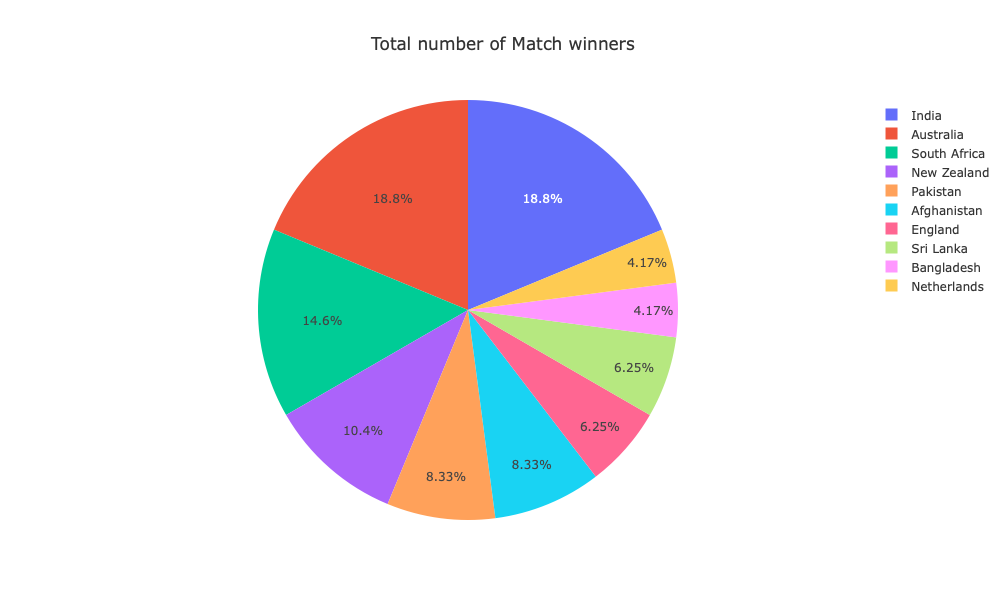

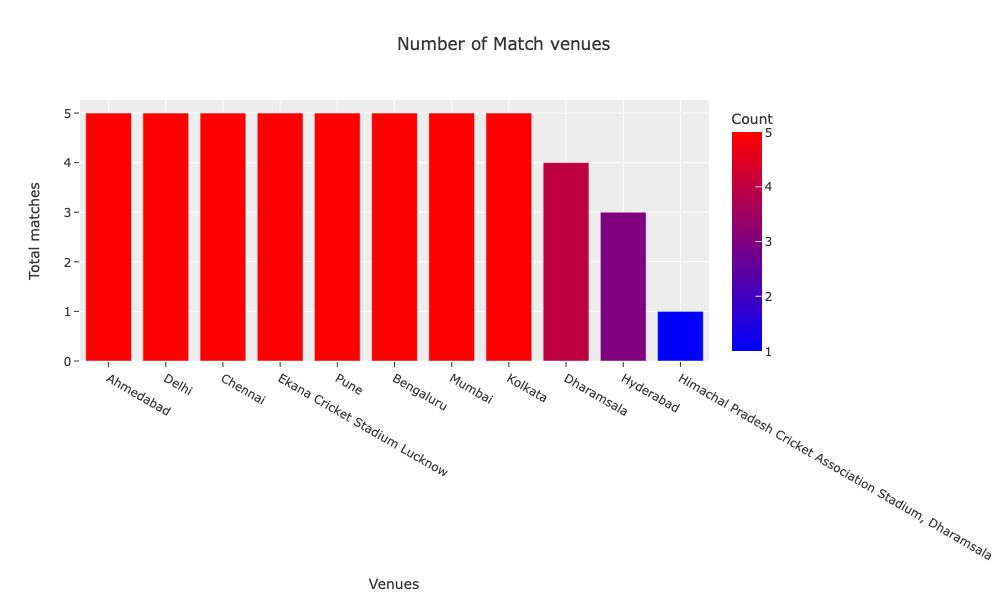

In [63]:
#Total number of winning Teams
total_winning_teams=pd.DataFrame(df2['Winner'].value_counts().reset_index())

print(total_winning_teams)

fig = px.pie(total_winning_teams, names='Winner', values='count', title='Total number of Match winners',
             labels={'Winner': 'Winner', 'count': 'Count'},
             color='Winner'
            )

fig.update_layout( height=600, width=800)
fig.update_layout(template='ggplot2')

fig.show()

# Total match Venues
total_venue=pd.DataFrame(df2['Venue'].value_counts().reset_index())

fig = px.bar(total_venue, x='Venue', y='count', title='Number of Match venues',
             labels={'Venue': 'Venue', 'count': 'Count'},
             color='count', color_continuous_scale='bluered', template='seaborn'
            )

fig.update_layout(xaxis_title='Venues', yaxis_title='Total matches', height=600, width=800)
fig.update_layout(template='ggplot2')

fig.show()

# world_cup_players Analysis

In [64]:
df3.head(10)

player_name    team_name image_of_player    battingStyle  \
0   Jonny Bairstow      England                  Right-hand bat   
1         Joe Root      England                  Right hand Bat   
2      Jos Buttler      England                  Right hand Bat   
3       Will Young  New Zealand                  Right hand Bat   
4  Rachin Ravindra  New Zealand                   Left hand Bat   
5      Imam-ul-Haq     Pakistan                   Left hand Bat   
6       Babar Azam     Pakistan                  Right hand Bat   
7     Saud Shakeel     Pakistan                   Left hand Bat   
8        Hasan Ali     Pakistan                  Right hand Bat   
9   Shaheen Afridi     Pakistan                   Left hand Bat   

             bowlingStyle          playingRole  \
0   Right-arm fast-medium  Wicketkeeper Batter   
1      Right arm Offbreak     Top order Batter   
2                          Wicketkeeper Batter   
3      Right arm Offbreak     Top order Batter   
4  Slow Left arm Orthodox     Top order Batter   
5                             Top order Batter   
6      Right arm Offbreak     Top order Batter   
7                          Middle order Batter   
8   Right arm Fast medium               Bowler   
9    Left arm Fast medium               Bowler   

                                         description  
0  Jonny Bairstow is an English cricketer known f...  
1  Joe Root is an English cricketer known for his...  
2  Jos Buttler is an English cricketer known for ...  
3  Will Young is a New Zealand cricketer known fo...  
4  Rachin Ravindra is a New Zealand cricketer kno...  
5  Imam-ul-Haq is a Pakistani cricketer known for...  
6  Babar Azam is a Pakistani cricketer known for ...  
7  Saud Shakeel is a Pakistani cricketer known fo...  
8  Hasan Ali is a Pakistani cricketer known for h...  
9  Shaheen Afridi is a Pakistani cricketer known ...

check for Null Values

In [66]:
df3.isnull().sum()

player_name         0
team_name           0
image_of_player    66
battingStyle        0
bowlingStyle        6
playingRole         0
description        17
dtype: int64

Number of players from a single team

       team_name  count
0    New Zealand     15
1       Pakistan     15
2     Bangladesh     15
3   South Africa     15
4      Australia     15
5          India     15
6        England     14
7      Sri Lanka     14
8    Afghanistan     13
9                    12
10   Netherlands      8


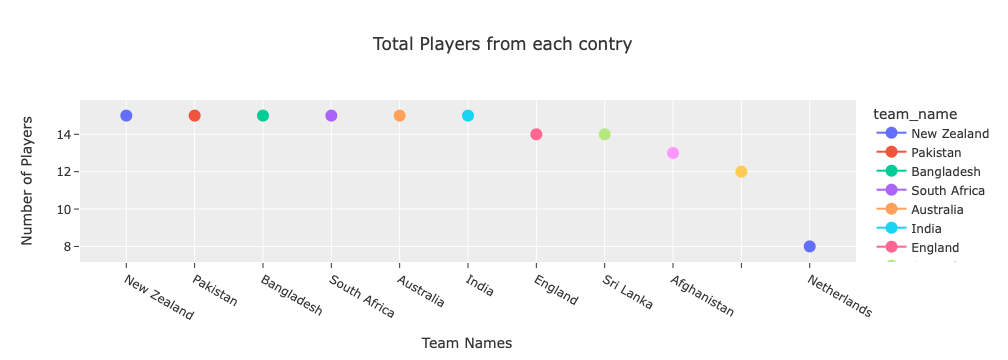

In [70]:
country_players=pd.DataFrame(df3['team_name'].value_counts().reset_index())

print(country_players)

# Visualisation

fig=px.line(country_players, x='team_name',y='count',title='Total Players from each contry',
           labels={'team_name':'team_name', 'count':'count'},
            line_shape="linear",
            markers=True, color='team_name'
        
          )
fig.update_layout(xaxis_title='Team Names', yaxis_title='Number of Players')
fig.update_traces(marker=dict(size=12))
fig.update_layout(template='ggplot2')

fig.show()

Playing roles

In [72]:
playing_Role=pd.DataFrame(df3['playingRole'].value_counts().reset_index())
playing_Role

playingRole  count
0               Bowler     46
1     Top order Batter     28
2           Allrounder     22
3  Wicketkeeper Batter     15
4                          10
5  Middle order Batter      9
6   Batting Allrounder      8
7       Opening Batter      7
8   Bowling Allrounder      4
9               Batter      2

In [76]:
# To remove the blank row
df3 = df3[df3['playingRole'] != ' ']

playing_Role=pd.DataFrame(df3['playingRole'].value_counts().reset_index())
playing_Role

playingRole  count
0               Bowler     46
1     Top order Batter     28
2           Allrounder     22
3  Wicketkeeper Batter     15
4  Middle order Batter      9
5   Batting Allrounder      8
6       Opening Batter      7
7   Bowling Allrounder      4
8               Batter      2

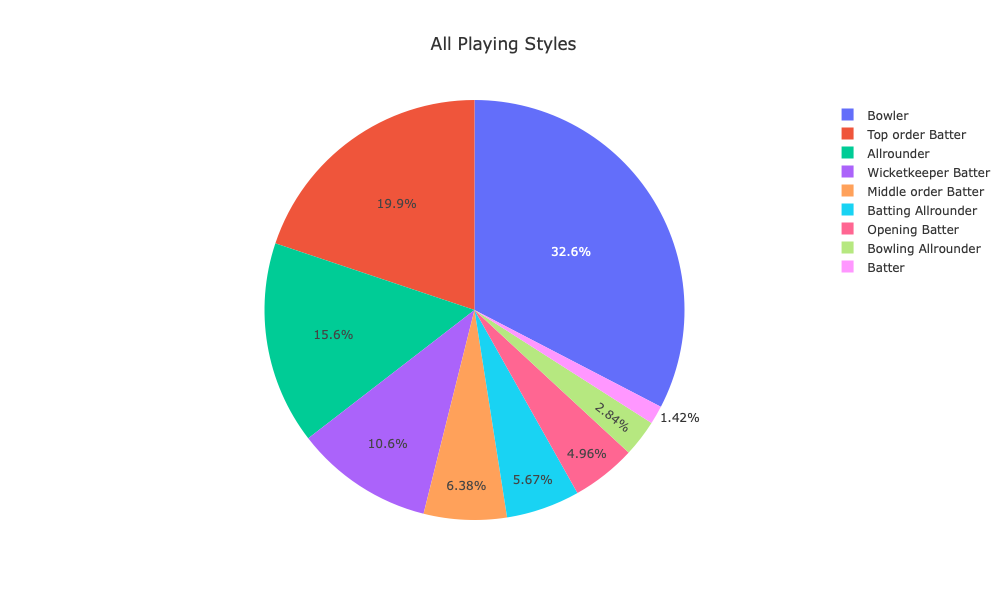

In [77]:
fig = px.pie(playing_Role, names='playingRole', values='count', title='All Playing Styles',
             labels={'bowlingStyle': 'playingRole', 'count': 'Count'},
             color='count'
            )

fig.update_layout(height=600, width=800)
fig.update_layout(template='ggplot2')

fig.show()

Batting Style numbers

In [88]:
df3 = df3[df3['battingStyle'] != 'Right-hand bat']

batting_style=pd.DataFrame(df3['battingStyle'].value_counts().reset_index())
batting_style

battingStyle  count
0  Right hand Bat     92
1   Left hand Bat     48

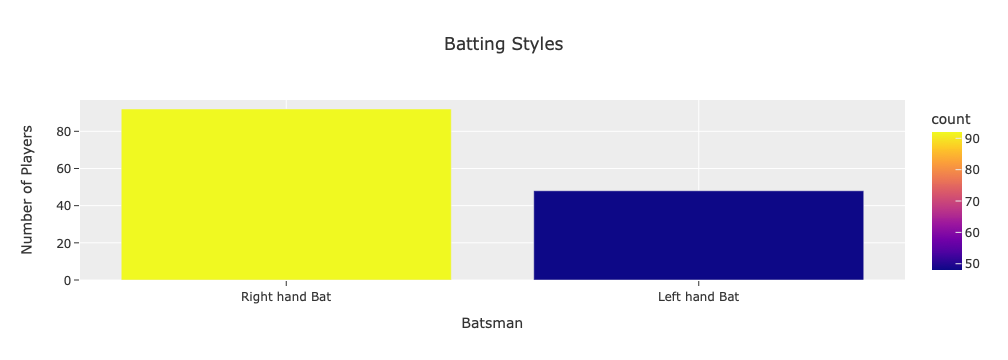

In [89]:
fig=px.bar(batting_style, x='battingStyle',y='count',title='Batting Styles ',
           labels={'battingStyle':'battingStyle', 'count':'count'},
           color='count'
          )
fig.update_layout(xaxis_title='Batsman', yaxis_title='Number of Players')
fig.update_layout(template='ggplot2')

fig.show()

Bowling Style numbers

In [90]:
bowling_style=pd.DataFrame(df3['bowlingStyle'].value_counts().reset_index())
bowling_style

bowlingStyle  count
0                     Right arm Offbreak     32
1                  Right arm Fast medium     16
2                                            16
3                  Right arm Medium fast     13
4                         Right arm Fast     10
5                       Right arm Medium      9
6                 Slow Left arm Orthodox      8
7                               Legbreak      7
8                   Left arm Fast medium      5
9                   Left arm Medium fast      4
10                       Legbreak Googly      3
11                    Right arm Legbreak      3
12                     Left arm Orthodox      3
13                     Left arm Chinaman      2
14                         Left arm Fast      1
15                   Left arm Wrist spin      1
16  Right arm Medium, Right arm Offbreak      1

In [91]:
# to remove the blank bowling style
df3 = df3[df3['bowlingStyle'] != ' ']

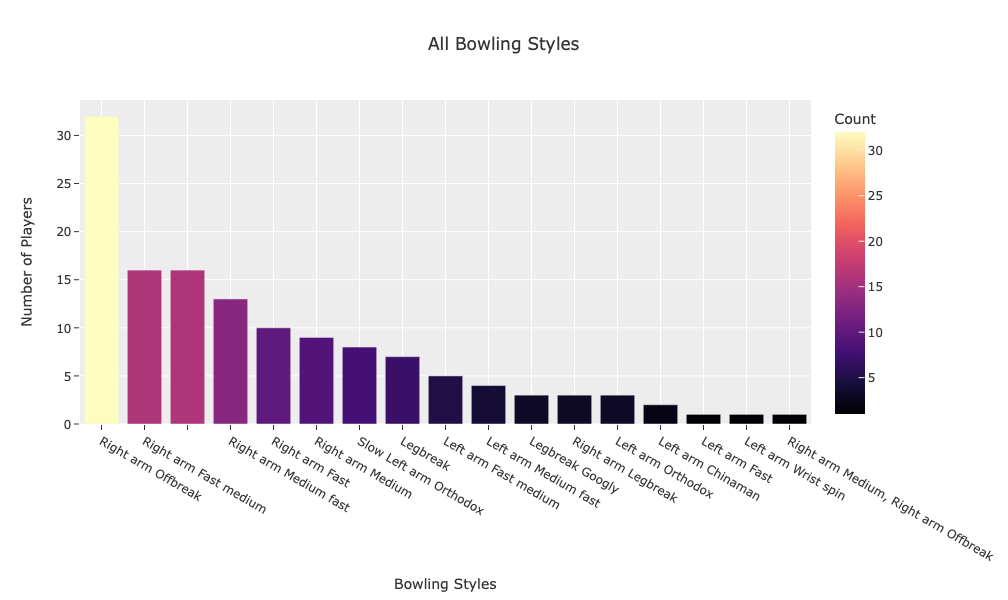

In [92]:
fig = px.bar(bowling_style, x='bowlingStyle', y='count', title='All Bowling Styles',
             labels={'bowlingStyle': 'Bowling Style', 'count': 'Count'},
             color='count', color_continuous_scale='magma', template='ggplot2'
            )

fig.update_layout(xaxis_title='Bowling Styles', yaxis_title='Number of Players', height=600, width=800)
fig.update_layout(template='ggplot2')

fig.show()